In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/kaggle/input/news-dataset-from-lenta-ru-2019-2023/lenta_ru_news_2019_2023.csv')

In [4]:
df = df.drop(['url', 'title', 'date'], axis=1)

In [5]:
df

,text,topic,tags
0,Россиянам дали советы при выборе чая. Рекоменд...,Россия,Общество
1,Спикер Госдумы Вячеслав Володин назвал угрозой...,Россия,Политика
2,Украинская ЛГБТ-активистка Виктория Гуйвик обв...,Культура,Фотография
3,В Москве полицейские застрелили мужчину при по...,Силовые структуры,Криминал
4,Исполняющая обязанности президента Боливии Жан...,Мир,Политика
...,...,...,...
496252,Глава Донецкой народной республики (ДНР) Денис...,Бывший СССР,Украина
496253,С 1 января 2024 года начал действовать закон о...,Россия,Политика
496254,С 1 января 2024 года материнский капитал будут...,Россия,Политика
496255,Директор Украинского института анализа и менед...,Бывший СССР,Украина


In [6]:
df['topic'].unique()

array(['Россия', 'Культура', 'Силовые структуры', 'Мир', 'Интернет и СМИ',
       'Спорт', 'Путешествия', 'Наука и техника', 'Бывший СССР',
       'Из жизни', 'Ценности', 'Экономика', 'Нацпроекты',
       'Среда обитания', 'Дом', '69-я параллель', nan, 'Оружие', 'Бизнес',
       'Моя страна', 'Мотор', 'Забота о себе'], dtype=object)

In [7]:
unique = df['topic'].value_counts()
unique

topic
Россия               96717
Мир                  79231
Бывший СССР          51071
Экономика            48980
Силовые структуры    30249
Спорт                28442
Наука и техника      25209
Интернет и СМИ       21739
Среда обитания       20395
Путешествия          19308
Ценности             18903
Культура             17948
Из жизни             17371
Моя страна            7794
Забота о себе         7589
Нацпроекты            2979
69-я параллель        1945
Дом                    255
Бизнес                  35
Оружие                  11
Мотор                    2
Name: count, dtype: int64

In [8]:
len(unique)

21

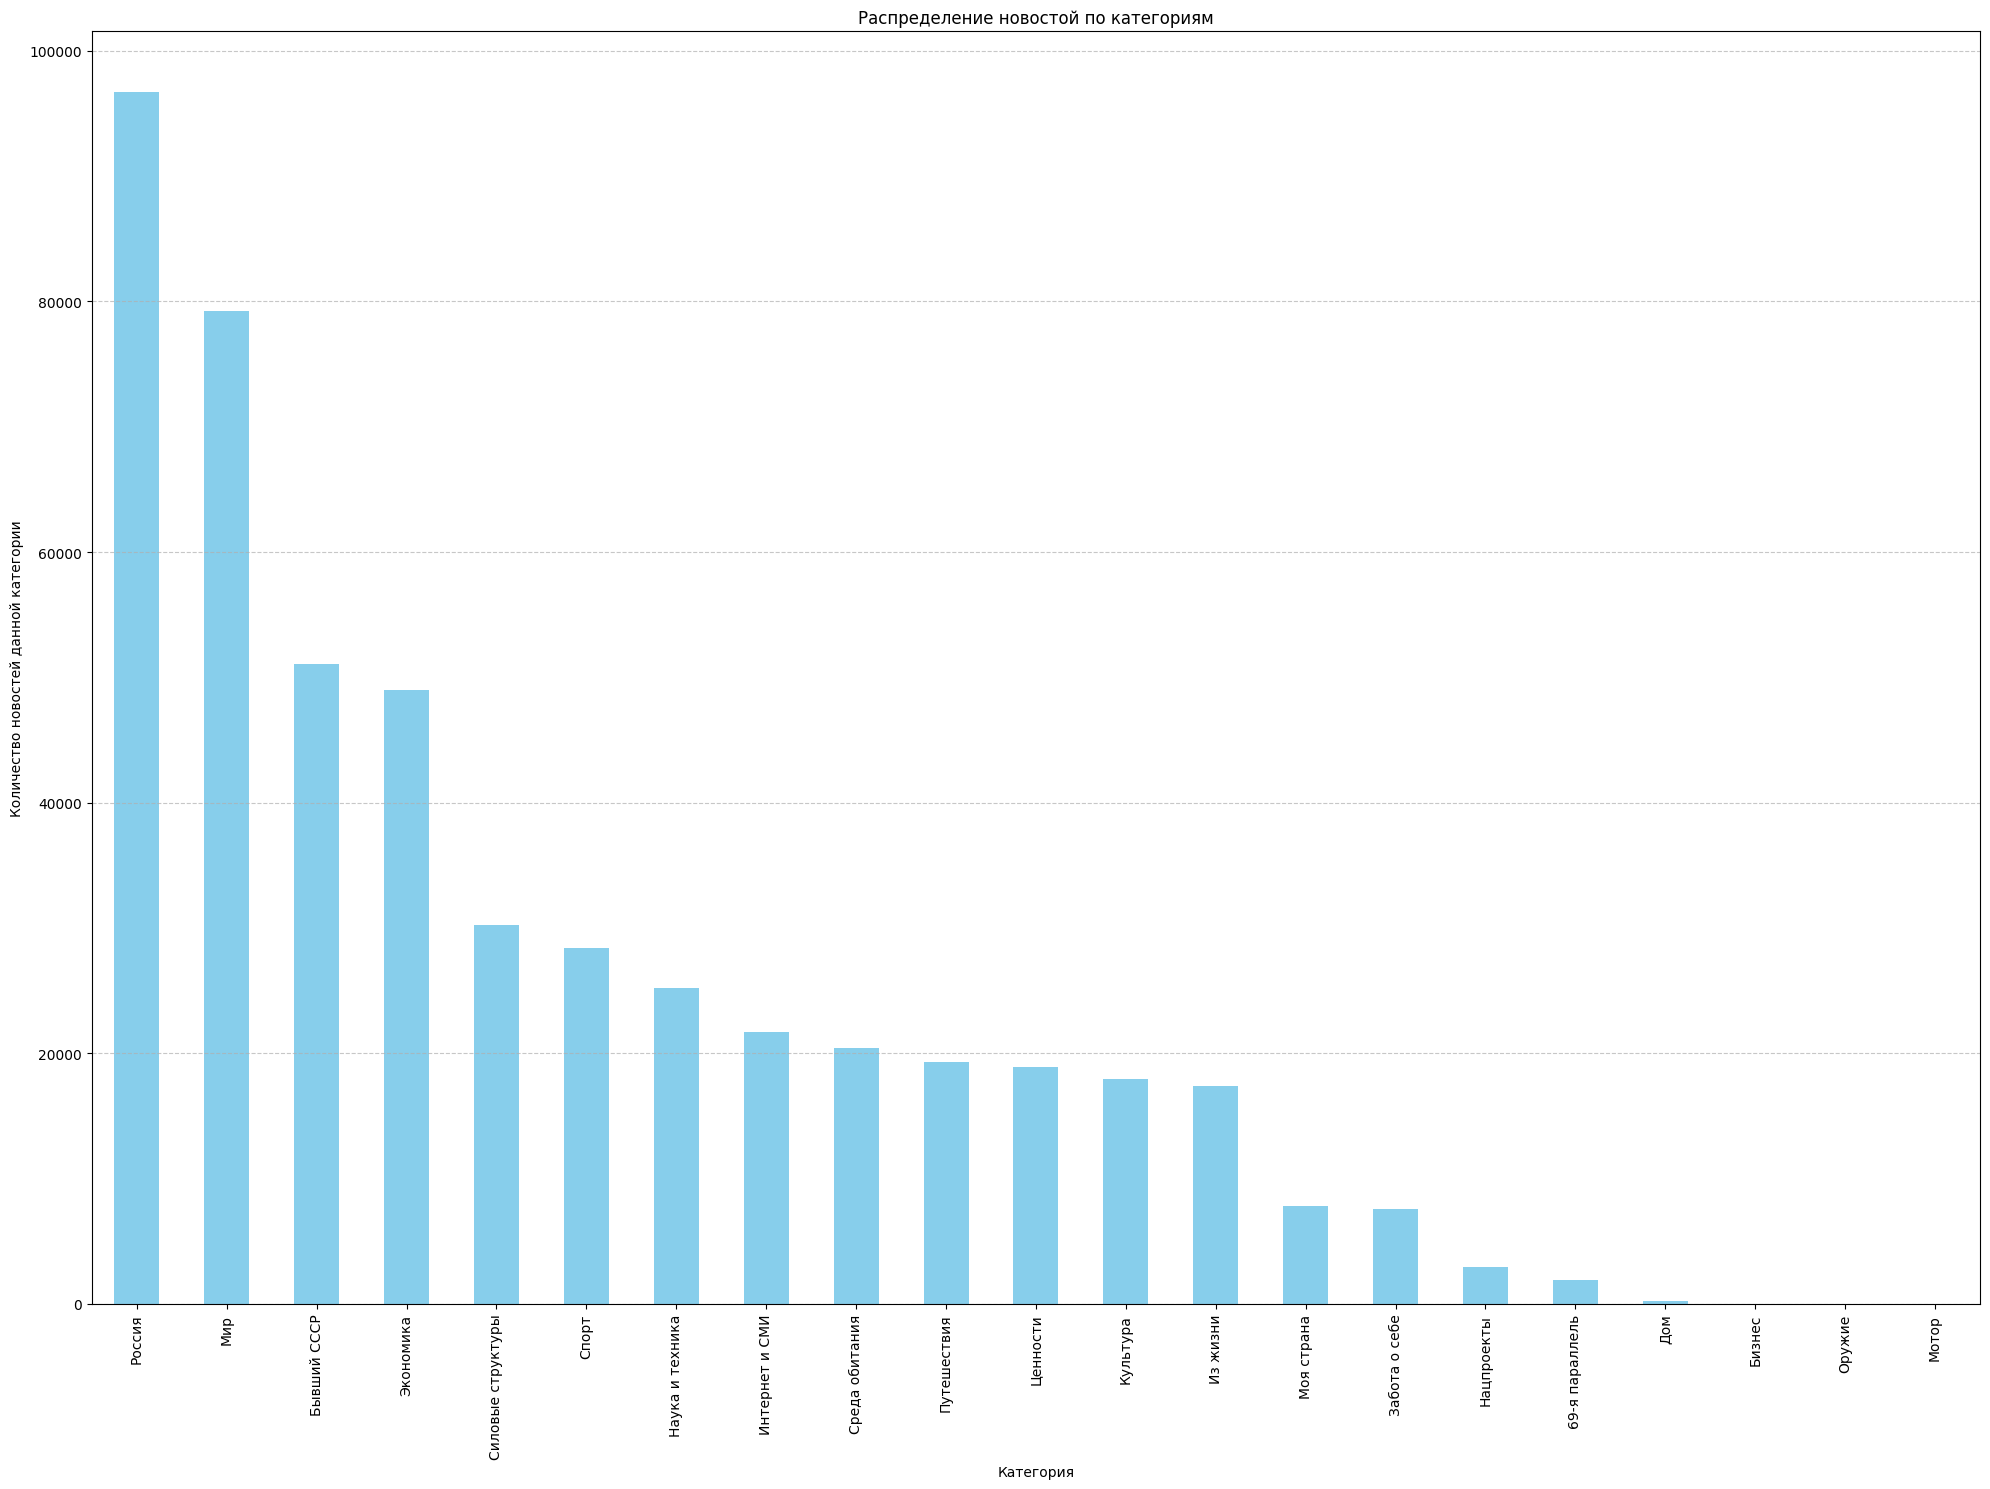

In [9]:
plt.figure(figsize=(20, 15))
unique.plot(kind='bar', color='skyblue')
plt.title('Распределение новостой по категориям')
plt.xlabel('Категория')
plt.ylabel('Количество новостей данной категории')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [10]:
df['tags'].unique()

array(['Общество', 'Политика', 'Фотография', 'Криминал', 'Интернет',
       'Происшествия', 'Музыка', nan, 'Мнения', 'Наука', 'Мир',
       'Закавказье', 'Пресса', 'Гаджеты', 'Россия',
       'Полиция и спецслужбы', 'Футбол', 'Зимние виды', 'Звери', 'Кино',
       'Белоруссия', 'Бокс и ММА', 'Стиль', 'ТВ и радио',
       'Социальная сфера', 'Оружие', 'Украина', 'Следствие и суд',
       'Космос', 'Летние виды', 'Госэкономика', 'Хоккей', 'Регионы',
       'Люди', 'Искусство', 'Город', 'Все', 'Прибалтика', 'История',
       'Экономика', 'Деловой климат', 'Дом', 'Внешний вид', 'Бизнес',
       'Конфликты', 'Coцсети', 'Театр', 'Рынки', 'Средняя Азия',
       'Явления', 'Культура', 'События', 'Здоровье', 'Техника', 'Игры',
       'Киберпреступность', 'Софт', 'Преступность', 'Капитал', 'Еда',
       'Книги', 'Преступная Россия', 'Москва', 'Реклама', 'Достижения',
       'Мемы', 'Авто', 'Молдавия', 'Экология', 'Туризм', 'Вооружение',
       'Финансы компаний', 'Мировой бизнес', '69-я параллел

In [11]:
unique = df['tags'].value_counts()
unique

tags
Политика            97275
Общество            55367
Украина             33421
Происшествия        21214
Следствие и суд     18994
                    ...  
Моя страна              5
Финансы компаний        4
Автобизнес              3
Мировой бизнес          1
Прогресс                1
Name: count, Length: 100, dtype: int64

In [12]:
len(unique)

100

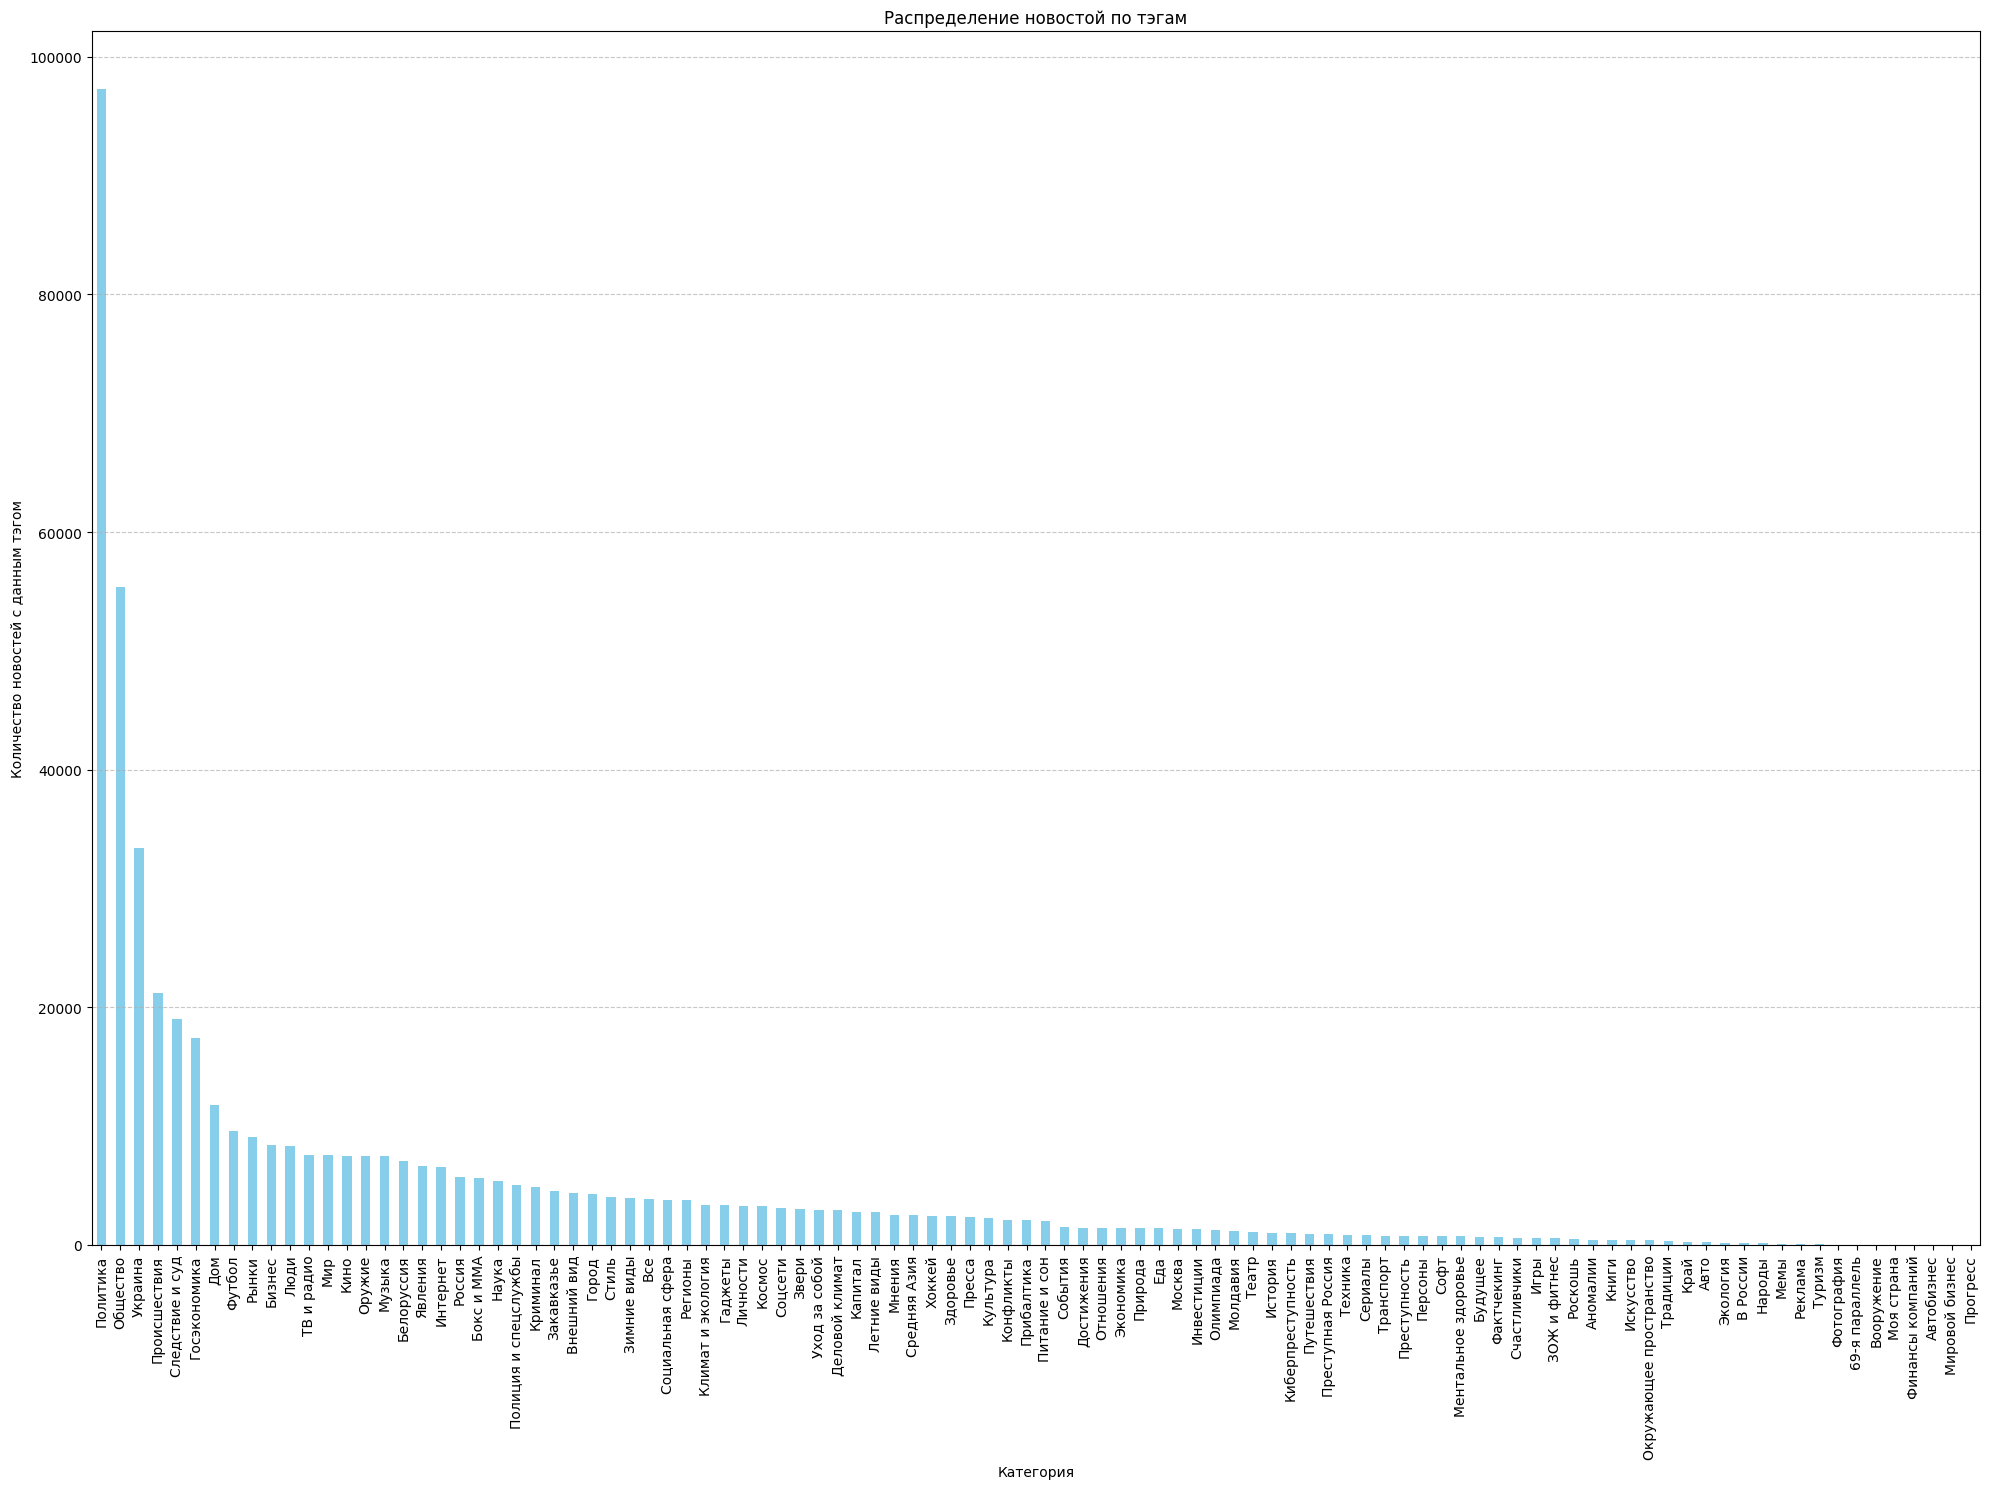

In [13]:
plt.figure(figsize=(20, 15))
unique.plot(kind='bar', color='skyblue')
plt.title('Распределение новостой по тэгам')
plt.xlabel('Категория')
plt.ylabel('Количество новостей с данным тэгом')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [47]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

russian_stopwords = stopwords.words('russian')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


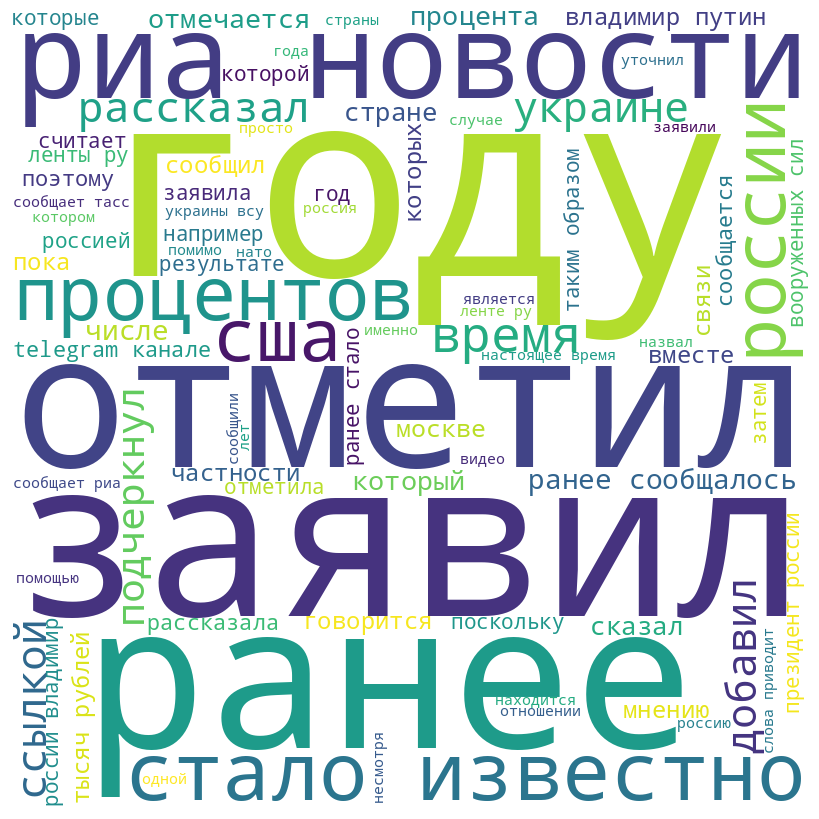

In [50]:
from wordcloud import WordCloud

df_sample = df.sample(n=100000, random_state=42)

comment_words = ''
stopwords = set(russian_stopwords + ['также', 'однако', 'это', 'словам', 'кроме', 'Также', 'Однако', 'Это', 'Словам', 'Кроме'])

for val in df_sample.text:
    val = str(val)
    tokens = val.split()
    
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens) + " "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
                    
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [ ]:
# df['encoded_cat'] = df['true_category'].astype('category').cat.codes
# df.head()

In [22]:
df.isna().sum()

text        0
topic      84
tags     5147
dtype: int64

In [23]:
df = df.dropna(subset=['tags'])

In [24]:
df.isna().sum()

text     0
topic    0
tags     0
dtype: int64

In [26]:
tag_counts = df['tags'].str.split(', ').explode().value_counts()
popular_tags = tag_counts[tag_counts > 20].index.tolist()

filtered_df = df[df['tags'].str.split(', ').explode().isin(popular_tags)]

In [30]:
filtered_df.tags.value_counts()

tags
Политика           97275
Общество           55367
Украина            33421
Происшествия       21214
Следствие и суд    18994
                   ...  
В России             132
Народы               131
Мемы                  67
Реклама               57
Туризм                55
Name: count, Length: 92, dtype: int64

In [43]:
len(set(filtered_df.tags.tolist()))

92